In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2017_up2_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2017_up2_tweet(e).csv', error_bad_lines=False))


In [3]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [4]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [5]:
text['text']

0      [Thanks, Bloomberg, ., But, it, seems, our, re...
1      [We, have, launched, new, trading, campaign, w...
2      [Guess, who, expands, far, beyond, Bitcoin, #,...
3      [We, spend, 100, days, to, increase, our, dail...
4      [I, am, writing, my, thesis, about, bitcoin, ,...
                             ...                        
323    [On, this, day, 2, years, ago, ,, Ethereum, wa...
324    [This, picture, says, everything, about, Ether...
325    [No, ,, you, are, not, getting, free, tokens, ...
326    [The, Ethereum, hard, fork, made, simple, !, h...
327    [I, think, Ethereum, is, very, smart, move, ,,...
Name: text, Length: 4212, dtype: object

In [6]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [7]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [8]:
text['pos tag']

0      [(thanks, NNS), (bloomberg, VBP), (., .), (but...
1      [(we, PRP), (have, VBP), (launched, VBN), (new...
2      [(guess, NN), (who, WP), (expands, VBZ), (far,...
3      [(we, PRP), (spend, VBP), (100, CD), (days, NN...
4      [(i, NN), (am, VBP), (writing, VBG), (my, PRP$...
                             ...                        
323    [(on, IN), (this, DT), (day, NN), (2, CD), (ye...
324    [(this, DT), (picture, NN), (says, VBZ), (ever...
325    [(no, DT), (,, ,), (you, PRP), (are, VBP), (no...
326    [(the, DT), (ethereum, NN), (hard, JJ), (fork,...
327    [(i, NN), (think, VBP), (ethereum, NN), (is, V...
Name: pos tag, Length: 4212, dtype: object

In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [10]:
text['text']

0      [thanks, bloomberg, ., seems, return, past, we...
1      [have, launched, new, trading, campaign, world...
2                      [guess, expands, bitcoin, #, trx]
3      [spend, days, increase, daily, trading, volume...
4      [i, am, writing, thesis, bitcoin, ,, blockchai...
                             ...                        
323    [day, years, ,, ethereum, was, valued, $, coin...
324             [picture, says, everything, ethereum, .]
325    [,, are, getting, free, tokens, ethereum, fork...
326    [ethereum, hard, fork, made, simple, !, https,...
327    [i, think, ethereum, is, smart, move, ,, do, u...
Name: text, Length: 4212, dtype: object

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [12]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [13]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

5755

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

5755


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"commence" + 0.000*"occupation" + 0.000*"collective" + 0.000*"beginner" + 0.000*"domain" + 0.000*"puerto" + 0.000*"adam" + 0.000*"bitcache"')
(1, '0.000*"stan" + 0.000*"blacklist" + 0.000*"conquer" + 0.000*"skeptical" + 0.000*"capitalization" + 0.000*"peterrizun" + 0.000*"corporates" + 0.000*"attest"')
(2, '0.001*"vienna" + 0.001*"repo" + 0.001*"induce" + 0.001*"widen" + 0.001*"juncture" + 0.001*"jpmorganfunds" + 0.001*"unanswered" + 0.001*"election"')
(3, '0.000*"meek" + 0.000*"crude" + 0.000*"flotus" + 0.000*"fabulous" + 0.000*"goldmoney" + 0.000*"preordain" + 0.000*"will" + 0.000*"inherit"')


In [31]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
sentences = article_contents

In [33]:
from gensim.models import Word2Vec

In [34]:
model = Word2Vec(sentences, min_count=1)

In [35]:
len(model.wv.vocab)

5755

In [36]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [37]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [38]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [39]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [40]:
temp_cluster_result['cluster'] = assigned_clusters

In [41]:
temp_cluster_result['raw_data'] = X.tolist()

In [42]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [43]:
from sklearn.metrics import pairwise_distances

In [44]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [45]:
len(cosine_centroid_list)

5755

In [46]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [47]:
sum(temp_distance[3])

196.09384536917233

In [48]:
import scipy.spatial.distance as dist

In [49]:
dist.cosine(X[0],cosine_centroid_list[0])

7.666077196943899e-05

In [50]:
dist.euclidean(X[0],cosine_centroid_list[0])

1.8452440811059994

In [51]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [52]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [53]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7,"[0.06192700192332268, -1.09110689163208, 0.703...",bitcoin,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000015,0.947153,0.052862,NaN
13,"[0.05291919782757759, -0.8934081792831421, 0.5...",http,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000021,0.112781,0.887240,NaN
33,"[0.04234553873538971, -0.7601482272148132, 0.4...",ethereum,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000026,0.091660,0.908366,NaN
87,"[0.04137240722775459, -0.6583008170127869, 0.4...",price,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000030,0.061107,0.938923,NaN
58,"[0.04692855849862099, -0.7200698256492615, 0.4...",time,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000023,0.054955,0.945068,NaN
197,"[0.046168774366378784, -0.7723690867424011, 0....",people,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000020,0.054340,0.945681,NaN
243,"[0.04226382449269295, -0.6106324195861816, 0.3...",think,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000030,0.052904,0.947125,NaN
437,"[0.033463433384895325, -0.491300493478775, 0.3...",cash,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000061,0.052084,0.947977,NaN
47,"[0.040224459022283554, -0.6949024200439453, 0....",make,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000021,0.045112,0.954909,NaN
320,"[0.04081568121910095, -0.722091794013977, 0.46...",value,0,"[0.0038500687, -0.06101654, 0.039260898, -0.02...",0.000041,0.043062,0.956979,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2318,"[-0.0022860474418848753, -0.03447474166750908,...",equity,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.005809,0.000820,1.004989,NaN
2574,"[-0.001252156449481845, -0.032086651772260666,...",arabia,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.006468,0.000410,1.006058,NaN
3898,"[0.002205032156780362, -0.030409157276153564, ...",convo,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.007382,0.000410,1.006972,NaN
1115,"[-0.002918810583651066, -0.031165214255452156,...",warn,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.008464,0.001230,1.007233,NaN
3879,"[-0.0011908506276085973, -0.032703351229429245...",bullshit,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.008067,0.000820,1.007246,NaN
4228,"[0.0004118824435863644, -0.026076477020978928,...",silly,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.008301,0.000615,1.007686,NaN
185,"[0.0017281272448599339, -0.027447327971458435,...",establish,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.008965,0.000615,1.008350,NaN
5599,"[0.004417642019689083, -0.02761700004339218, 0...",byzantium,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.009001,0.000410,1.008591,NaN
1489,"[0.005066779442131519, -0.031445905566215515, ...",background,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.009262,0.000410,1.008852,NaN
1335,"[-0.0013519172789528966, -0.02745244838297367,...",shock,1,"[0.0005097832, -0.009757765, 0.0067927637, -0....",0.010062,0.000615,1.009447,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3096,"[0.0019060567719861865, -0.024775955826044083,...",complainer,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.022625,0.000205,1.022420,NaN
1865,"[0.000409330619731918, -0.014172607101500034, ...",sensationalism,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.046250,0.000205,1.046045,NaN
3985,"[0.002613118151202798, -0.006665231194347143, ...",sunnystartups,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.057983,0.000205,1.057778,NaN
1578,"[0.000634337542578578, -0.013898287899792194, ...",timescale,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.058302,0.000205,1.058097,NaN
3454,"[0.004249016288667917, -0.013306629844009876, ...",scrape,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.060059,0.000205,1.059854,NaN
4212,"[-0.0036035096272826195, -0.016850491985678673...",breakdown,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.061157,0.000410,1.060746,NaN
5608,"[0.0008269280660897493, -0.014335423707962036,...",dare,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.061672,0.000205,1.061467,NaN
1166,"[0.00017824680253397673, -0.012710882350802422...",lite,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.063112,0.000410,1.062701,NaN
5354,"[0.002115914598107338, -0.010404922068119049, ...",turmoil,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.065157,0.000205,1.064952,NaN
2899,"[0.003097179578617215, -0.008569563739001751, ...",dust,2,"[0.00089451607, -0.0052424134, 0.0031386106, -...",0.068132,0.000205,1.067927,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3647,"[0.002709418535232544, 0.01085574459284544, -0...",kilobyte,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.064104,0.000205,1.063898,NaN
4474,"[0.0012370465556159616, 0.008208670653402805, ...",indifferentluck,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.084628,0.000205,1.084423,NaN
5134,"[-0.00127403624355793, 0.011136244982481003, -...",whenever,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.095636,0.000410,1.095226,NaN
5380,"[0.000309097784338519, 0.004035136196762323, -...",elonmusk,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.105177,0.000205,1.104972,NaN
5153,"[-0.003762157168239355, 0.011160084046423435, ...",safeguard,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.114082,0.000205,1.113877,NaN
946,"[-0.003796358359977603, 0.004596950486302376, ...",forsaw,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.118920,0.000205,1.118715,NaN
4879,"[0.0020834002643823624, 0.01057787612080574, -...",civickey,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.127514,0.000205,1.127309,NaN
5005,"[-0.00020818633493036032, 0.002820418449118733...",truestory,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.144689,0.000205,1.144484,NaN
5121,"[-0.0021573640406131744, 0.009210651740431786,...",attractive,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.151200,0.000205,1.150995,NaN
2394,"[-0.005073000211268663, 0.007179662119597197, ...",keepthehardforkscoming,3,"[-0.00021368176, 0.002300423, -0.0011422596, 0...",0.157338,0.000205,1.157133,NaN


In [57]:
y_km = temp_cluster_result['cluster'].values

In [58]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

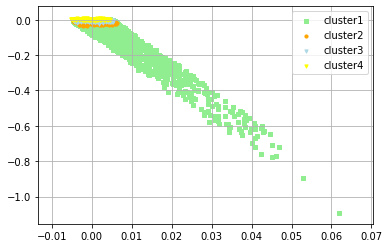

In [59]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소 돈

4570

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

837

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

252

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 이슈

96

In [64]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소,돈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 5 # 사회이슈

In [65]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [67]:
kmeans.inertia_

175.10864921416777

In [68]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 2 1 ... 0 0 0]


In [69]:
cluster_values= list(model.wv.vocab)

In [70]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-175.10864


In [71]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [72]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7296371


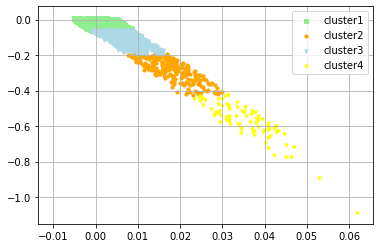

In [73]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [74]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [75]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [76]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [77]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [78]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [79]:
import scipy.spatial.distance as dist

In [80]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [81]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3899,"[0.005831887945532799, -0.01845656894147396, 0...",foxbusiness,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.025305,0.000205,1.025100,NaN
4463,"[0.001978982472792268, -0.020262684673070908, ...",precedent,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.025888,0.000410,1.025478,NaN
5458,"[0.005651559215039015, -0.022959640249609947, ...",hallucination,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.025900,0.000205,1.025695,NaN
3033,"[0.004050516523420811, -0.013748310506343842, ...",ignorant,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026226,0.000410,1.025816,NaN
1870,"[-0.0029496122151613235, -0.019804101437330246...",stabilize,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026819,0.000615,1.026203,NaN
2700,"[-0.0015059380093589425, -0.017648201435804367...",goldmoney,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026449,0.000205,1.026244,NaN
4512,"[0.004335091914981604, -0.021580927073955536, ...",mentality,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026905,0.000615,1.026290,NaN
2262,"[0.00040270158206112683, -0.017218589782714844...",deceitful,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026581,0.000205,1.026375,NaN
3776,"[-0.00018897224799729884, -0.01967605389654636...",emergence,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026597,0.000205,1.026392,NaN
5183,"[0.001328323152847588, -0.019066745415329933, ...",timeframes,0,"[0.001192149, -0.01893485, 0.012225529, -0.006...",0.026828,0.000410,1.026417,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
873,"[0.021254172548651695, -0.27816036343574524, 0...",blockstream,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.027850,0.007382,1.020468,NaN
743,"[0.021890539675951004, -0.28042834997177124, 0...",bear,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.030631,0.006562,1.024070,NaN
628,"[0.017221756279468536, -0.28410327434539795, 0...",video,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.032948,0.007792,1.025156,NaN
111,"[0.01587658002972603, -0.28164026141166687, 0....",smart,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.031994,0.006562,1.025433,NaN
121,"[0.013268641196191311, -0.2870652675628662, 0....",rise,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.035060,0.008612,1.026447,NaN
938,"[0.01869865693151951, -0.2842504680156708, 0.1...",theory,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.033907,0.006562,1.027345,NaN
35,"[0.02123958244919777, -0.27638331055641174, 0....",write,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.034996,0.007587,1.027409,NaN
219,"[0.01877387799322605, -0.27631229162216187, 0....",demand,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.033080,0.005537,1.027543,NaN
387,"[0.016483917832374573, -0.2811471223831177, 0....",rule,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.037072,0.007587,1.029485,NaN
217,"[0.015967287123203278, -0.27894267439842224, 0...",others,1,"[0.017815297, -0.28045714, 0.1806531, -0.10055...",0.039166,0.008202,1.030964,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 기술발전

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1744,"[0.01109994389116764, -0.1061374843120575, 0.0...",science,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.025814,0.001846,1.023968,NaN
5198,"[0.007272602990269661, -0.10812761634588242, 0...",multisig,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.028594,0.002871,1.025723,NaN
273,"[0.01022317260503769, -0.10392360389232635, 0....",accelerate,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.028552,0.002256,1.026296,NaN
36,"[0.0045744506642222404, -0.10961206257343292, ...",thesis,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.028728,0.002256,1.026472,NaN
1111,"[0.0029482331592589617, -0.1133071556687355, 0...",dominance,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.030835,0.004306,1.026529,NaN
3887,"[0.008169444277882576, -0.10892195254564285, 0...",dumb,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.029860,0.003076,1.026784,NaN
2566,"[0.00245195091702044, -0.10821233689785004, 0....",sale,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.030143,0.002666,1.027477,NaN
400,"[0.0030942587181925774, -0.10862410813570023, ...",discover,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.030201,0.002666,1.027535,NaN
2883,"[0.005564047023653984, -0.1097865179181099, 0....",index,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.031142,0.003486,1.027656,NaN
2447,"[0.006055756006389856, -0.11097132414579391, 0...",usage,2,"[0.006900269, -0.10734822, 0.069272906, -0.038...",0.029732,0.001846,1.027887,NaN


In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
103,"[0.03649160638451576, -0.5787767767906189, 0.3...",call,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.032096,0.024197,1.007899,NaN
166,"[0.03147747367620468, -0.5738701224327087, 0.3...",many,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.034101,0.025427,1.008674,NaN
402,"[0.02944980189204216, -0.5770608186721802, 0.3...",gold,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.044186,0.032604,1.011582,NaN
130,"[0.0309620201587677, -0.5667639374732971, 0.36...",point,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.041687,0.019480,1.022207,NaN
70,"[0.03165203332901001, -0.5638788342475891, 0.3...",transaction,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.049009,0.022761,1.026247,NaN
558,"[0.0385526567697525, -0.5656746625900269, 0.36...",core,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.059213,0.026657,1.032556,NaN
483,"[0.03369981795549393, -0.5897220969200134, 0.3...",talk,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.083906,0.028913,1.054993,NaN
335,"[0.03947286680340767, -0.5577356219291687, 0.3...",scale,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.091388,0.026247,1.065141,NaN
83,"[0.03174841031432152, -0.5906242728233337, 0.3...",term,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.088554,0.020916,1.067638,NaN
37,"[0.03804461285471916, -0.5834644436836243, 0.3...",blockchain,3,"[0.035396624, -0.5735544, 0.36917624, -0.20500...",0.106947,0.024812,1.082135,NaN


In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #인플

4674

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #비즈

261

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #기술발전

738

In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

82

In [90]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 9 # 기술발전
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [91]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.7296371 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.7296371

In [92]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2017_up2_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2017_up2_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

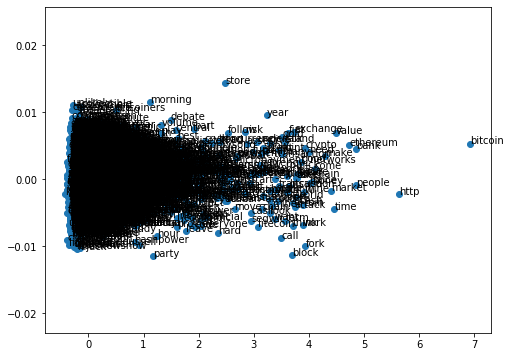

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>